Honeycomb Lattice Model (graphene)

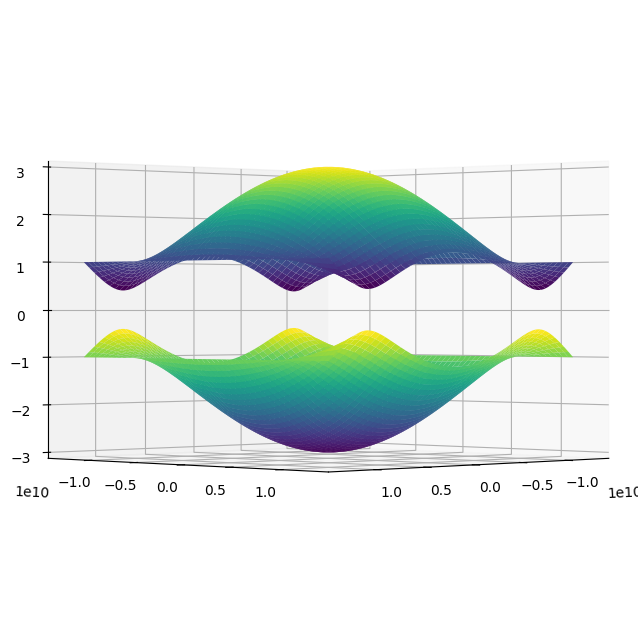

In [37]:
import numpy as np
import matplotlib.pyplot as plt

t=3 #(ev)
a=0.246*10**(-9) #格子定数
tau1=a*np.array([0,1/np.sqrt(3)])
tau2=a*np.array([-1/2, -1/2/np.sqrt(3)])
tau3=a*np.array([1/2, -1/2/np.sqrt(3)])

def cal_graphene_band(kx,ky):
    k=np.array([kx,ky])
    h1=-t*np.exp(1j*np.dot(k,tau1))
    h2=-t*np.exp(1j*np.dot(k,tau2))
    h3=-t*np.exp(1j*np.dot(k,tau3))
    h=h1+h2+h3
    H=np.array([[0,h],[np.conjugate(h),0]])
    eig=np.linalg.eigvalsh(H)
    return eig

fig = plt.figure(figsize=(8, 8)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定

kx_list=np.linspace(-np.pi/a,np.pi/a,1000)
ky_list=np.linspace(-np.pi/a,np.pi/a,500)

KX,KY=np.meshgrid(kx_list,ky_list)

eig=np.array([[cal_graphene_band(kx,ky) for kx in kx_list] for ky in ky_list])
surf = ax.plot_surface(KX, KY, eig[:,:,0], cmap='viridis',linewidth=0.3) # 曲面図
surf = ax.plot_surface(KX, KY, eig[:,:,1], cmap='viridis',linewidth=0.3)
ax.view_init(elev=0, azim=45)
plt.show()

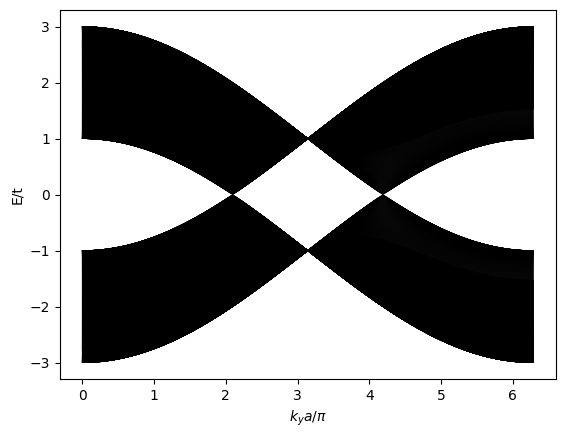

In [26]:
import numpy as np
import matplotlib.pyplot as plt

t=1 #(ev)
Ny=1000
tau1=np.array([0,1/np.sqrt(3)])
tau2=np.array([-1/2, -1/2/np.sqrt(3)])
tau3=np.array([1/2, -1/2/np.sqrt(3)])

def cal_graphene_band(kx,ky):
    k=np.array([kx,ky])
    h1=-t*np.exp(1j*np.dot(k,tau1))
    h2=-t*np.exp(1j*np.dot(k,tau2))
    h3=-t*np.exp(1j*np.dot(k,tau3))
    h=h1+h2+h3
    H=np.array([[0,h],[np.conjugate(h),0]])
    eig=np.linalg.eigvalsh(H)
    return eig

# fig = plt.figure(figsize=(8, 8)) # 図の設定

kx_list=np.linspace(0,2*np.pi,100)
ky_list=np.linspace(0,2*np.pi,Ny)

KX,KY=np.meshgrid(kx_list,ky_list)

for ky in ky_list:
    eig=np.array([cal_graphene_band(kx,ky) for kx in kx_list])
    plt.plot(kx_list,eig[:,0],color="black",linewidth=0.5)
    plt.plot(kx_list,eig[:,1],color="black",linewidth=0.5)
plt.ylabel("E/t")
plt.xlabel("$k_ya/\\pi$")
plt.show()